# Red Recurrente LSTM
## Imports Necesarios

In [1]:
# Imports necesarios
import numpy as np
import pandas as pd
#import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (15, 8)
plt.style.use('ggplot')
#from sklearn import linear_model
#from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers import LSTM
from keras.callbacks import EarlyStopping
#from keras.layers import Flatten
#from keras.optimizers import Adam
#from pyimagesearch import models

Using TensorFlow backend.
/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarn

## Cargar archivo de Entradas

In [38]:
#cargamos los datos de entrada
data = pd.read_csv("/Users/manuelmoya/Documents/USACH/2019-1er/Tesis/1.Desarrollo/05.AnalisisDatos/Datos/wf1_train_fin_serie.csv", index_col=0)
#veamos cuantas dimensiones y registros contiene
#data.shape
# Ver los 1ros registros
data.head()

,ws,wp1t-44,wp1t-43,wp1t-42,wp1t-41,wp1t-40,wp1t-39,wp1t-38,wp1t-37,wp1t-36,...,wp1t-9,wp1t-8,wp1t-7,wp1t-6,wp1t-5,wp1t-4,wp1t-3,wp1t-2,wp1t-1,wp1
100,0.81,0.035,0.005,0.000,0.000,0.010,0.025,0.03,0.01,0.00,...,0.01,0.01,0.010,0.010,0.010,0.080,0.025,0.08,0.0,0.000
101,0.68,0.005,0.000,0.000,0.010,0.025,0.030,0.01,0.00,0.01,...,0.01,0.01,0.010,0.010,0.080,0.025,0.080,0.00,0.0,0.000
102,0.49,0.000,0.000,0.010,0.025,0.030,0.010,0.00,0.01,0.00,...,0.01,0.01,0.010,0.080,0.025,0.080,0.000,0.00,0.0,0.000
103,0.57,0.000,0.010,0.025,0.030,0.010,0.000,0.01,0.00,0.00,...,0.01,0.01,0.080,0.025,0.080,0.000,0.000,0.00,0.0,0.000
104,0.88,0.010,0.025,0.030,0.010,0.000,0.010,0.00,0.00,0.00,...,0.01,0.08,0.025,0.080,0.000,0.000,0.000,0.00,0.0,0.015


## Separar Datos de Entrenamiento (Train) y Test

In [39]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
#data_train = data.sample(frac=1,random_state=200) 
#data_test = data.drop(data_train.index) 

# 75% train y 25% test
data_train, data_test = train_test_split(data,test_size=0.2, random_state=200)

dataset_train = data_train.values
x_train = dataset_train[:,0:44]
y_train = dataset_train[:,44]

dataset_test = data_test.values
x_test = dataset_test[:,0:44]
y_test = dataset_test[:,44]

#dataX2 =  pd.DataFrame()
#dataX2["ws"] =data_train["ws"]
#dataX2["wd"] =data_train["wd"]
#dataX2["anno"] =data_train["anno"]
#dataX2["mes"] =data_train["mes"]

#x_train= np.array(dataX2,"float32")
#y_train = np.array(data_train['wp1'].values,"float32")

#y_train  

#print(y_train[0:1].shape) 

#x_train.shape

#x_test
x_train[0]

array([2.54 , 0.05 , 0.03 , 0.   , 0.   , 0.04 , 0.04 , 0.09 , 0.125,
       0.085, 0.055, 0.085, 0.211, 0.266, 0.16 , 0.075, 0.175, 0.12 ,
       0.015, 0.05 , 0.07 , 0.005, 0.   , 0.03 , 0.02 , 0.075, 0.105,
       0.16 , 0.18 , 0.231, 0.306, 0.286, 0.246, 0.306, 0.306, 0.306,
       0.316, 0.381, 0.411, 0.426, 0.391, 0.346, 0.02 , 0.03 ])

In [40]:
y_train[0]

0.02

## Adaptar Datos para LSTM

In [42]:
timesteps = 1

#reshape
x_train_re = x_train.reshape((x_train.shape[0], timesteps, x_train.shape[1]))
x_train = x_train_re


x_test_re = x_test.reshape((x_test.shape[0], timesteps, x_test.shape[1]))
x_test = x_test_re




#print(x_train.shape, y_train.shape)

In [43]:
x_train.shape[1]

1

In [44]:
x_train.shape[2]

44

In [45]:
x_train

array([[[2.54  , 0.05  , 0.03  , ..., 0.346 , 0.02  , 0.03  ]],

       [[1.8716, 0.005 , 0.005 , ..., 0.03  , 0.032 , 0.034 ]],

       [[4.36  , 0.326 , 0.486 , ..., 0.19  , 0.316 , 0.211 ]],

       ...,

       [[0.74  , 0.095 , 0.05  , ..., 0.    , 0.    , 0.    ]],

       [[3.8   , 0.03  , 0.18  , ..., 0.722 , 0.712 , 0.506 ]],

       [[2.16  , 0.115 , 0.11  , ..., 0.015 , 0.    , 0.    ]]])

In [46]:
y_train

array([0.02 , 0.035, 0.17 , ..., 0.015, 0.09 , 0.   ])

In [47]:
nro_train = len(data_train)

## Crear Modelo, Entrenarlo y Predecir

In [93]:

csv_logger = keras.callbacks.CSVLogger('training.log', separator=',', append=False)

## cargamos las 4 combinaciones de las compuertas XOR
#training_data = x_train
 
# y estos son los resultados que se obtienen, en el mismo orden
#target_data = y_train


# import norm
#from keras.constraints import max_norm
# instantiate norm
#norm = max_norm(3.0)
keras.callbacks.Callback()
early_stopping_monitor = EarlyStopping(patience=10)

#, kernel_constraint=max_norm(3), bias_constraint=max_norm(3))
model = Sequential()
model.add(LSTM(44, return_sequences = True,input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(LSTM(44, return_sequences = True, activation='relu' ))
model.add(LSTM(44, return_sequences = True, activation='relu' ))
model.add(LSTM(44, return_sequences = True, activation='relu' ))
model.add(LSTM(44, return_sequences = True, activation='relu' ))
model.add(LSTM(44, return_sequences = True, activation='relu' ))
model.add(LSTM(44, return_sequences = True, activation='relu' ))
model.add(LSTM(44, return_sequences = True, activation='relu' ))
model.add(LSTM(44, return_sequences = True, activation='relu' ))
model.add(LSTM(44, return_sequences = True, activation='relu' ))
model.add(LSTM(44, return_sequences = True, activation='relu' ))
model.add(LSTM(44, return_sequences = True, activation='relu' ))
model.add(LSTM(44, return_sequences = False, activation='relu'))
model.add(Dense(1, activation="linear"))


model.compile(loss='mean_absolute_error',
              optimizer='adam',
              metrics=['mean_squared_error'])

#'binary_accuracy'

#metrics=['accuracy']
 
hist=model.fit(x_train, y_train, epochs=200, batch_size=44, verbose=2, shuffle=False, validation_data=(x_test, y_test),callbacks=[early_stopping_monitor])
#validation_data=(x_test, y_test),
 
# evaluamos el modelo
#scores = model.evaluate(x_train, y_train)
 
#print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
#print (model.predict(x_train).round())

Train on 37300 samples, validate on 9326 samples
Epoch 1/200
 - 68s - loss: 0.1863 - mean_squared_error: 0.0640 - val_loss: 0.1826 - val_mean_squared_error: 0.0589
Epoch 2/200
 - 39s - loss: 0.1841 - mean_squared_error: 0.0616 - val_loss: 0.1825 - val_mean_squared_error: 0.0591
Epoch 3/200
 - 41s - loss: 0.1841 - mean_squared_error: 0.0616 - val_loss: 0.1825 - val_mean_squared_error: 0.0591
Epoch 4/200
 - 39s - loss: 0.1841 - mean_squared_error: 0.0616 - val_loss: 0.1825 - val_mean_squared_error: 0.0592
Epoch 5/200
 - 47s - loss: 0.1841 - mean_squared_error: 0.0616 - val_loss: 0.1824 - val_mean_squared_error: 0.0592
Epoch 6/200
 - 43s - loss: 0.1841 - mean_squared_error: 0.0616 - val_loss: 0.1824 - val_mean_squared_error: 0.0594
Epoch 7/200
 - 38s - loss: 0.1841 - mean_squared_error: 0.0616 - val_loss: 0.1824 - val_mean_squared_error: 0.0594
Epoch 8/200
 - 39s - loss: 0.1841 - mean_squared_error: 0.0615 - val_loss: 0.1823 - val_mean_squared_error: 0.0594
Epoch 9/200
 - 43s - loss: 0.18

In [94]:
y_pred_train = model.predict(x_train)    
y_pred_test = model.predict(x_test) 

## Obtener Metricas del Modelo

In [95]:
# evaluamos el modelo
scores = model.evaluate(x_train, y_train)

37300/37300 [==============================] - 10s 274us/step


In [96]:
#print("R2:",  r2_keras(y_train, y_pred_train) )
print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
#print("\n%s: %.2f%%" % (model.metrics_names[2], scores[2]*100))
#print (model.predict(x_train).round())


loss: 18.40%

mean_squared_error: 6.04%


In [97]:
from sklearn.metrics import r2_score
print('Coefficient of determination Train (R^2): %.2f' % r2_score(y_train, y_pred_train))
print('Coefficient of determination Test (R^2): %.2f' % r2_score(y_test, y_pred_test))

Coefficient of determination Train (R^2): -0.07
Coefficient of determination Test (R^2): -0.07


## Graficar Resultados

In [16]:
neuronas =100
#pred_train = model.predict(x_train)
corr = np.corrcoef(y_train, y_pred_train[:, 0])

In [17]:
pred_test_plot = y_pred_test[2000:2050]
y_test_plot = y_test[2000:2050]

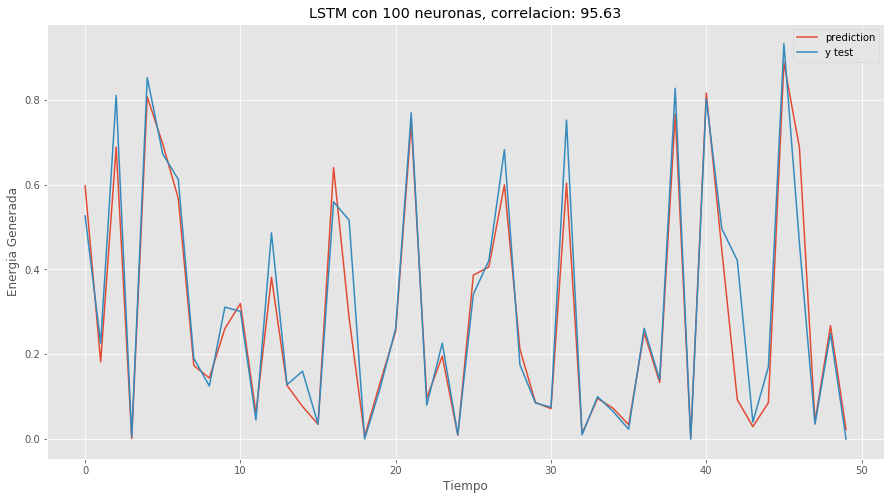

In [18]:
plt.plot(pred_test_plot, label ="prediction")
plt.plot(y_test_plot, label ="y test")
#plt.plot(trainPredictPlot, label ="train pred" )
plt.title("LSTM con %i neuronas, correlacion: %.2f" % (neuronas, corr[1][0] * 100))
plt.ylabel("Energia Generada")
plt.xlabel("Tiempo")
plt.legend()
plt.show()

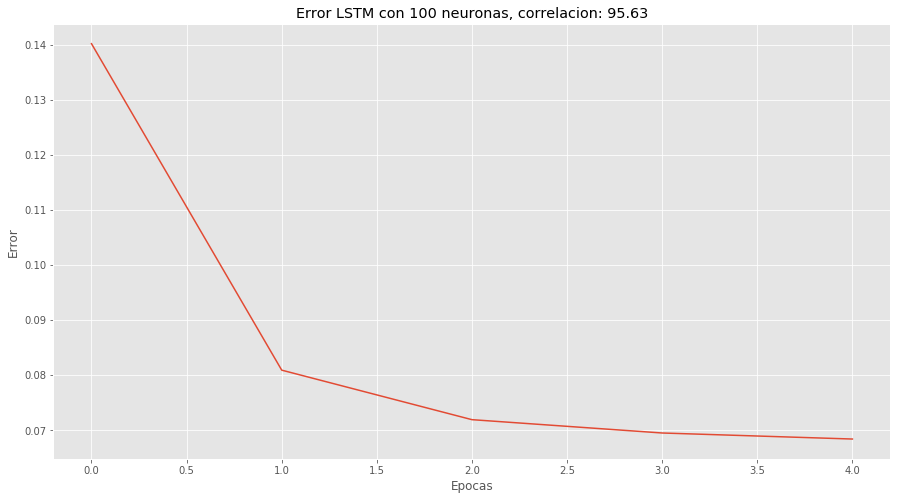

In [19]:
registro = pd.read_csv('training.log', sep=",")
plt.plot(registro["epoch"].values, registro["loss"].values)
plt.title("Error LSTM con %i neuronas, correlacion: %.2f" % (neuronas, corr[1][0] * 100))
plt.ylabel("Error")
plt.xlabel("Epocas")
plt.show()

In [20]:
print(hist.history.keys())

dict_keys(['val_loss', 'val_mean_absolute_error', 'loss', 'mean_absolute_error'])


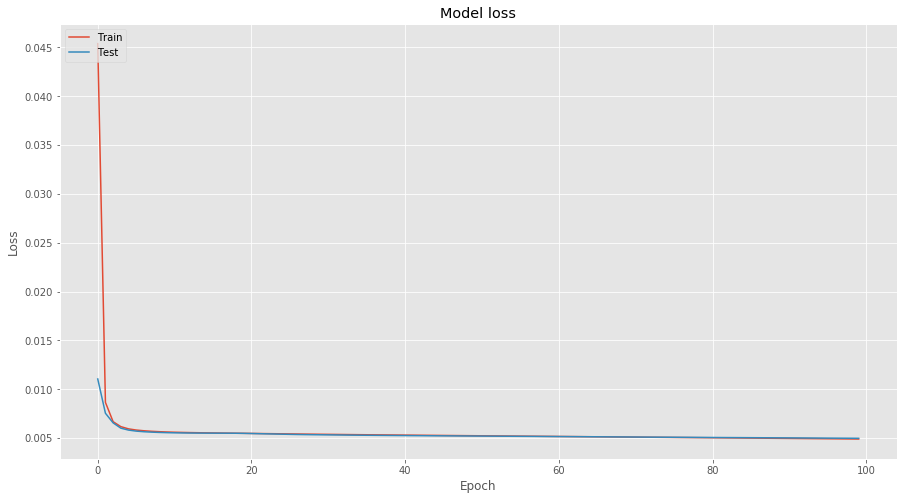

In [21]:
# Plot training & validation accuracy values
#plt.plot(hist.history['binary_accuracy'])
##plt.plot(hist.history['val_binary_accuracy'])
#plt.title('Model accuracy')
#plt.ylabel('Accuracy')
#plt.xlabel('Epoch')
#plt.legend(['Train', 'Test'], loc='upper left')
#plt.show()

# Plot training & validation loss values
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [68]:
## Vamos a comprobar:
# Quiero predecir cuántos "wp1" voy a obtener por 13 ws (wind speed mph),
# según nuestro modelo, hacemos:

#y_12 = regr.predict([[12,70.4,2012,7]])
#test= np.array([[3.66,106.24,2009,7]])
#y_12 = model.predict(test)


#print(y_12)

In [188]:

#df_test = pd.read_csv("/Users/manuelmoya/Documents/USACH/2019-1er/Tesis/1.Desarrollo/05.AnalisisDatos/Datos/test_24.csv")
#veamos cuantas dimensiones y registros contiene

# Ver los 1ros registros
#df_test.head()

In [189]:
#df_test.describe()

In [37]:
#x_test = df_test[:,1:5]
#y_train = dataset[:,5

In [191]:
 
#df = df_test.values
#x_test = df[:,0:4]

#x_test

#y_12 = model.predict(x_test)

#print(y_12)

In [48]:
df_pred = pd.DataFrame(data=pred_test_plot, columns=["pred"])
#df_pred
df_pred.to_csv('/Users/manuelmoya/Documents/USACH/2019-1er/Tesis/1.Desarrollo/05.AnalisisDatos/Datos/pred_iter1_LSTM.csv')
